<a href="https://colab.research.google.com/github/Mouli1704/Innomatics_Hackathon_31-08-2024/blob/main/Gradient_Descent_Demonstration_28_29Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Demonstration - Step by Step

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.getcwd() # Get Current Working Directory

'/content'

In [ ]:
os.listdir()

['.config', 'sample_data']

## let us start with some data

In [ ]:
X = 2*np.random.rand(100,1) #random 100 data point

In [ ]:
y = 4 + 2*X+ np.random.randn(100,1)

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

## Let us visualize the data

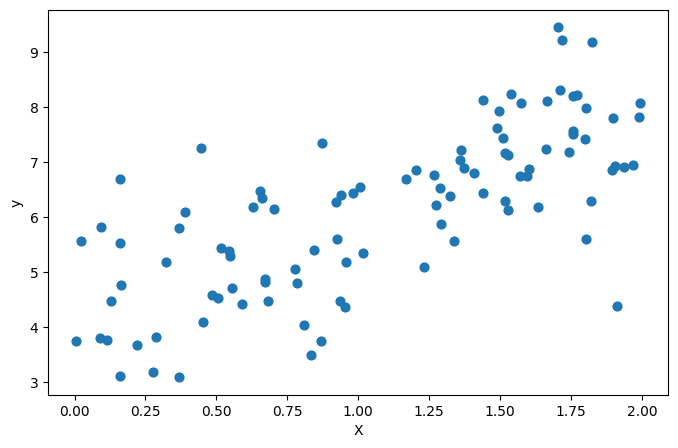

In [ ]:
plt.subplots(figsize = (8,5))
plt.scatter(X,y, s=40) # size of the scatter
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Demonstrating GDA using `user-defined functions`

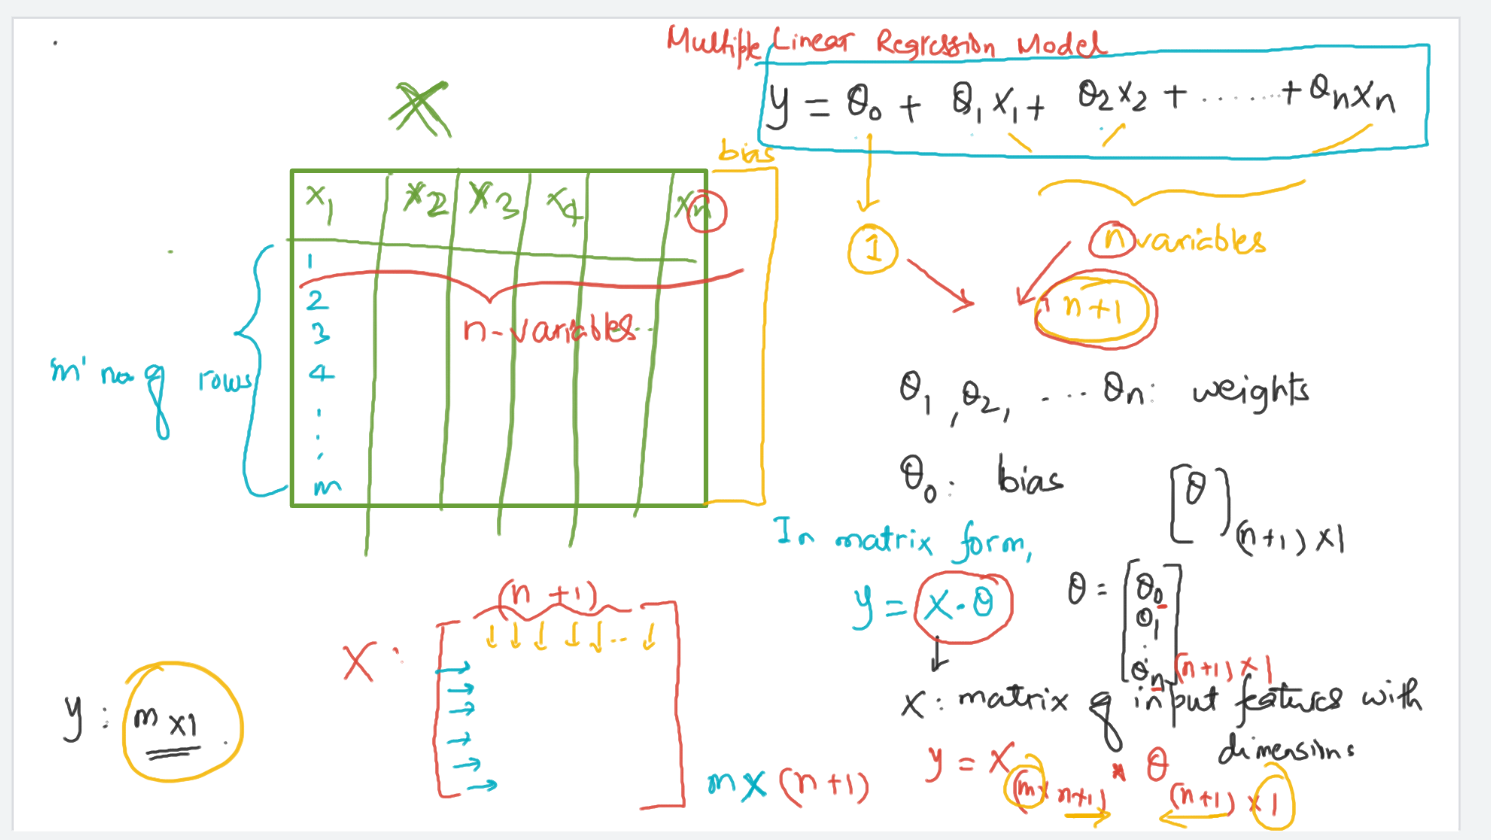

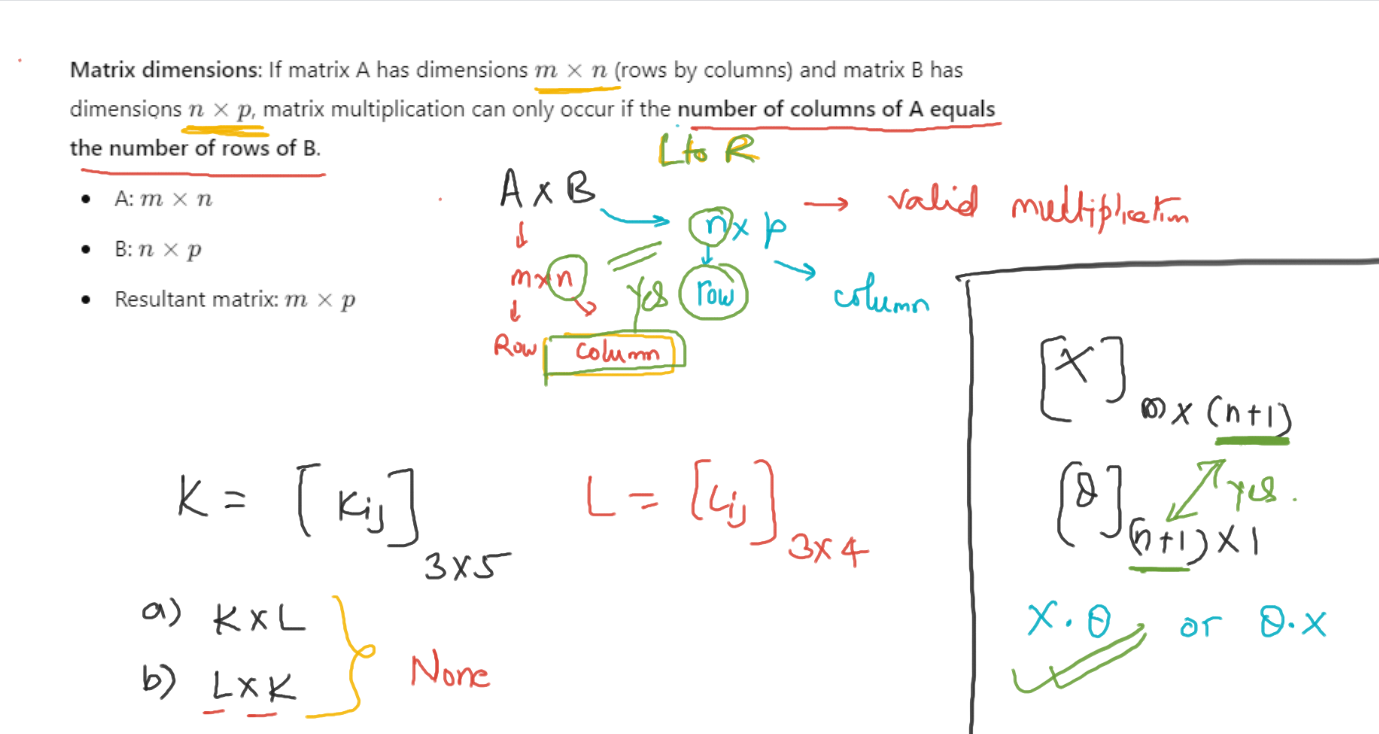

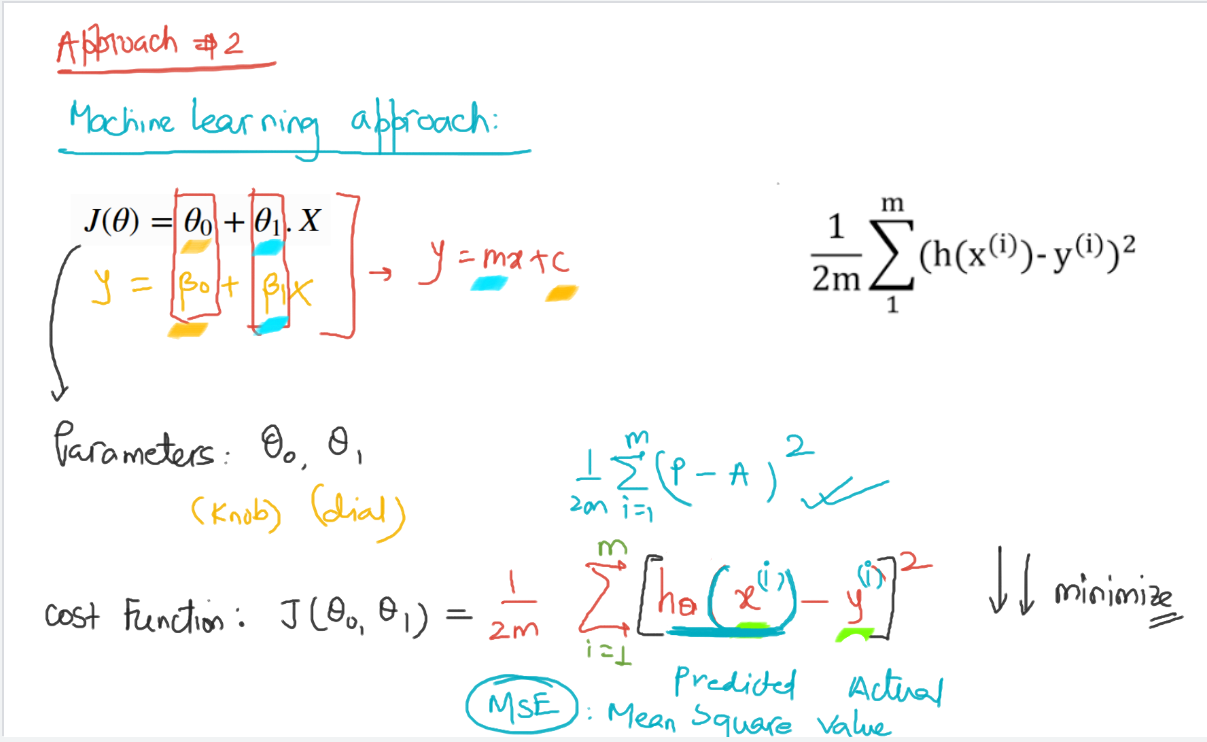

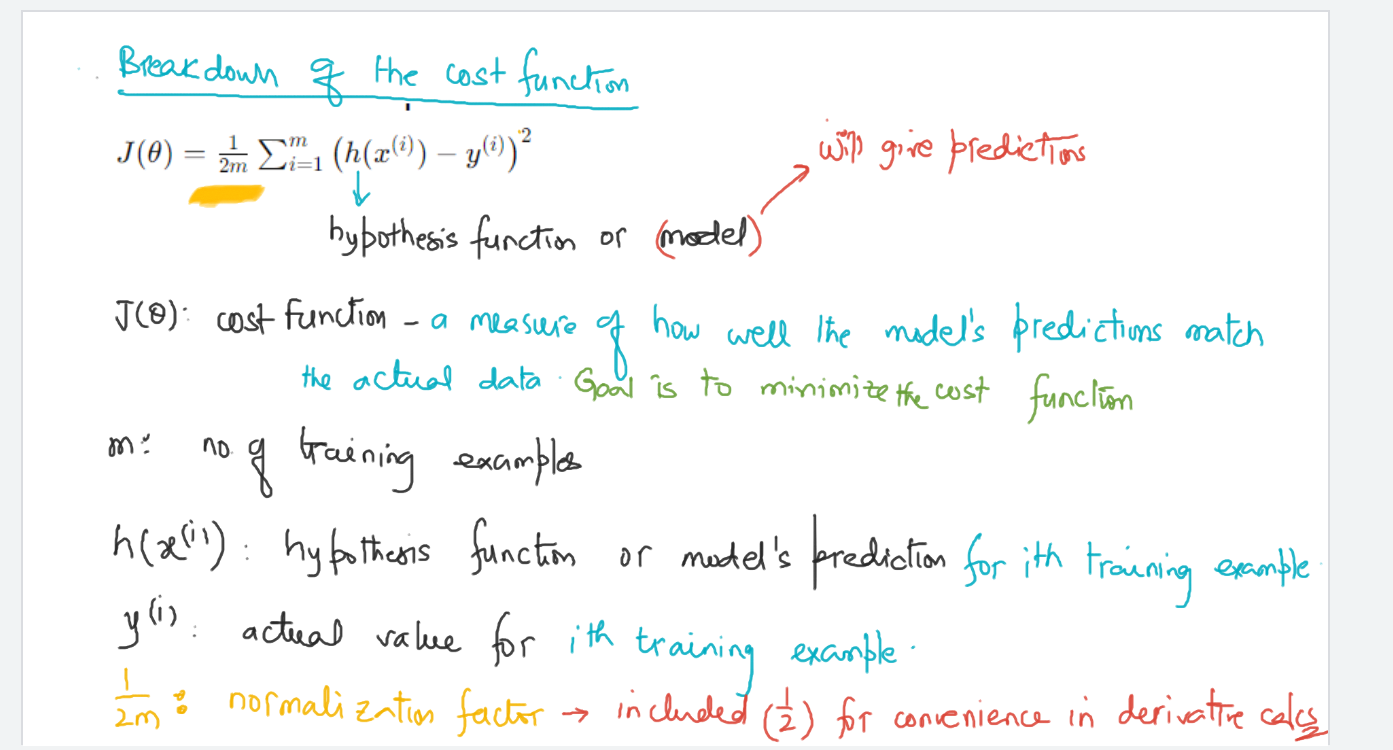

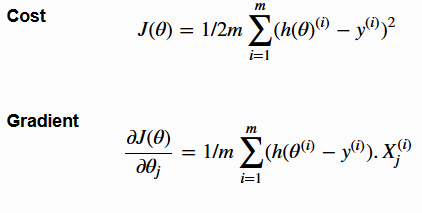

In [ ]:
def cal_cost(theta, X,y):
  '''
  Calculates the cost for given X and y
  theta = vector of thetas
  X = Matrix of X's with shape (m, n+1)
  y = Vector of y's with shape (m, 1)

  where
    m is the number of observations
    n is the number of features/input variables
  '''
  m = len(y) # no. of rows
  predictions = X.dot(theta)
  cost =(1/(2*m))*np.sum(np.square(predictions - y)) #cost function

  return cost

In [ ]:
# # Define the input matrix X (3 examples, 2 features including bias)
# X = np.array([
#     [1, 2],
#     [1, 3],
#     [1, 4]
# ])

# # Define the parameter vector theta
# theta = np.array([0.5, 1.0])

# # Perform the dot product
# result = np.dot(X, theta)

# # Print the result
# result


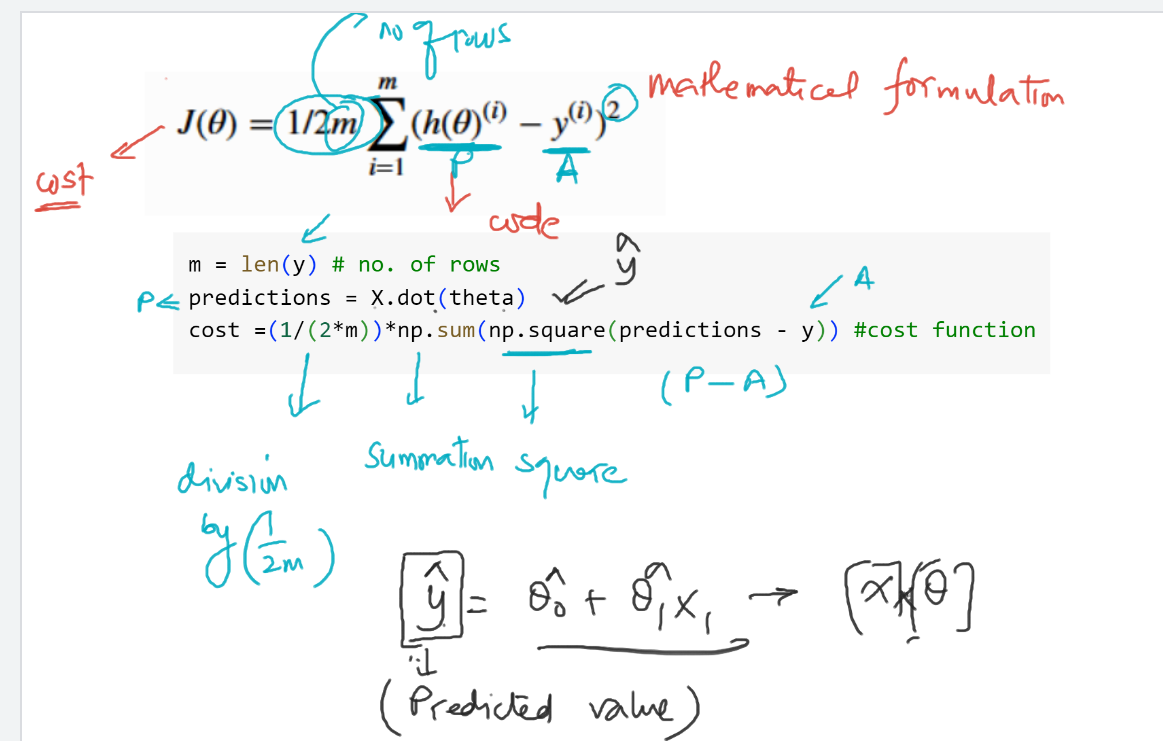

**# STOCHASTIC GRADIENT DESCENT** `SGD`

In [ ]:
def sgd(X,y, theta, learning_rate = 0.01, epochs = 10):
  '''
  X = Matrix of X with added bias units
  y = Vector of y
  theta = Vector of thetas - randomly assigned
  learning_rate : default 0.01
  epochs: number of times model will run through the entire the training set - default 100

  '''
  m = len(y) #number of training examples
  cost_history = np.zeros(epochs*m) #zero-array to store the cost after each update
  theta_history = np.zeros((epochs*m , theta.shape[0])) #zero-array to store the parameter (weights & biases) values

  for epoch in range(epochs): #outer-loop for the specified (user-input) - no. of iterations -> epochs
    for i in range(m): #inner-loop runs through each row/training example or one by one row for each epoch

      #### STOCHASTIC ----Random Selection ------- #
      rand_index = np.random.randint(0,m) #generates a random integer between 0 (included) and m (not included)
      X_i = X[rand_index, :].reshape(1, X.shape[1]) #selects the random one row and reshape it into a 2-D arra
      y_i = y[rand_index, :].reshape(1,1)

      prediction = X_i.dot(theta)
      theta = theta - learning_rate *(X_i.T.dot(prediction - y_i))

      #### Updating the theta and cost value arrays
      cost = cal_cost(theta, X, y)
      theta_history[epoch*m+i, :] = theta.T #2Parameters
      cost_history[epoch*m+i] = cost # uni-dimension

  return theta, cost_history, theta_history

In [ ]:
rand_index = np.random.randint(0,100)

In [ ]:
rand_index

95

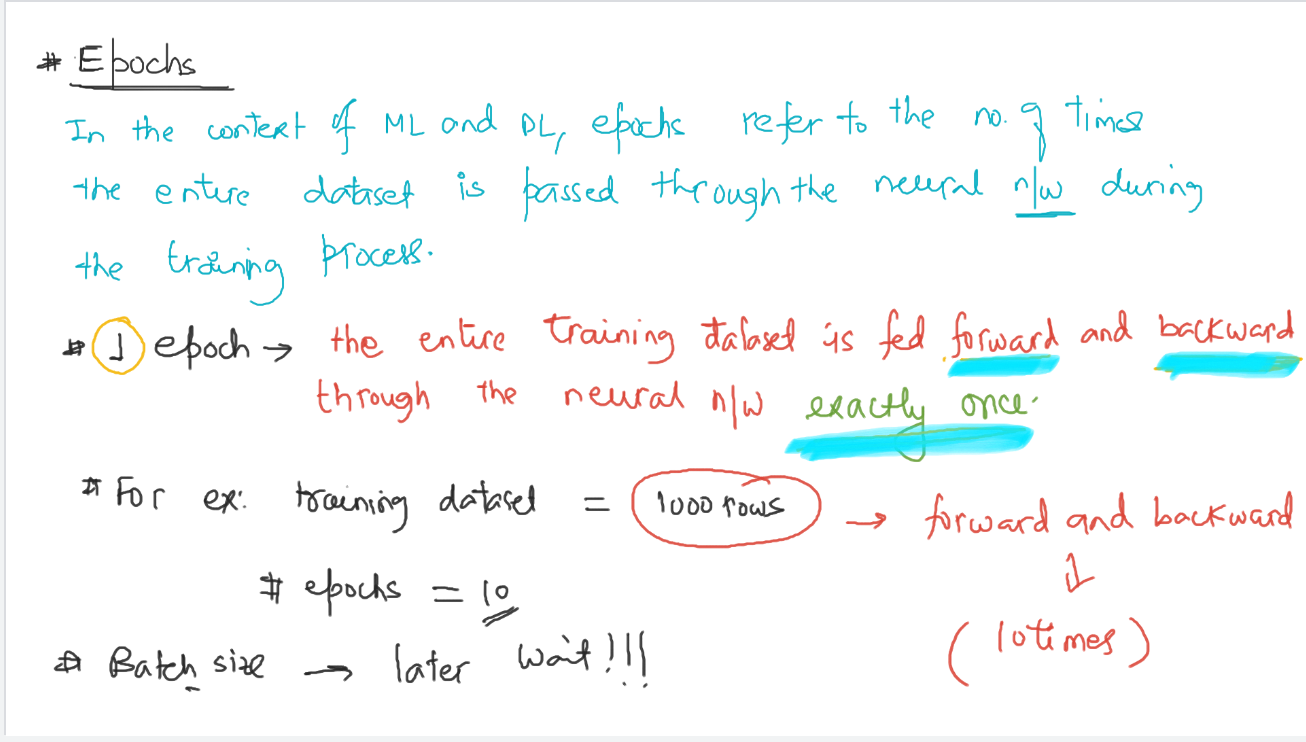

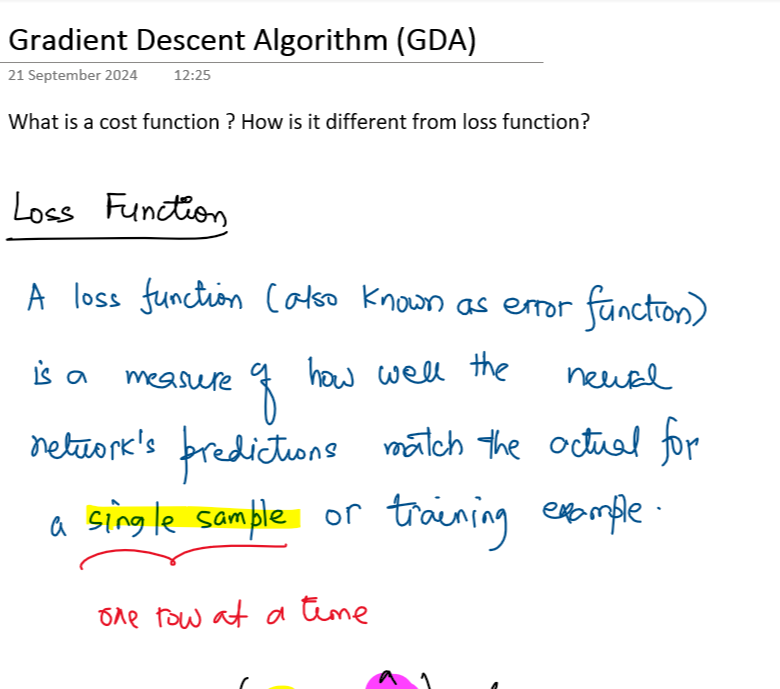

In [ ]:
### Initialize theta
theta = np.random.randn(2,1)
print(theta)
X
### Add the bias term (one column) to the feature matrix X
X_b = np.c_[np.ones((len(X),1)),X] # concatenation

[[0.13685981]
 [0.70175428]]


In [ ]:
X_b[:10]

array([[1.        , 1.56947527],
       [1.        , 1.27583379],
       [1.        , 1.90516982],
       [1.        , 0.5452515 ],
       [1.        , 0.16116783],
       [1.        , 1.49555252],
       [1.        , 1.70532672],
       [1.        , 1.89460399],
       [1.        , 0.55532286],
       [1.        , 1.0057752 ]])

In [ ]:
X_b.shape

(100, 2)

In [ ]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(X_b, y, theta,epochs=10)

In [ ]:
theta_sgd

array([[3.67540424],
       [2.15665506]])

In [ ]:
print('SGD Theta0:          {:0.3f},\nSGD Theta1:          {:0.3f}'.format(theta_sgd[0][0], theta_sgd[1][0]))
print('SGD Final cost/MSE:  {:0.3f}'.format(cost_history_sgd[-1]))

SGD Theta0:          3.675,
SGD Theta1:          2.157
SGD Final cost/MSE:  0.533


Text(0.5, 0.5, 'Final Cost: 0.533\nTheta0: 3.675\nTheta1: 2.157')

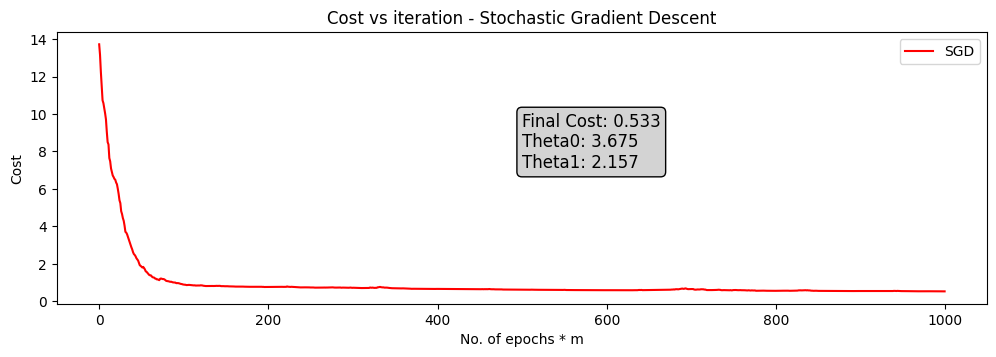

In [ ]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(12,12)) #canvas ready

# Plot for SGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='red')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No. of epochs * m')
plt.ylabel('Cost')
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)


In [ ]:
cost_history_sgd[:10]

array([13.71952855, 13.15923088, 12.24003309, 11.49557976, 10.72926592,
       10.57952905, 10.3222294 , 10.03772944,  9.71673705,  9.05371632])

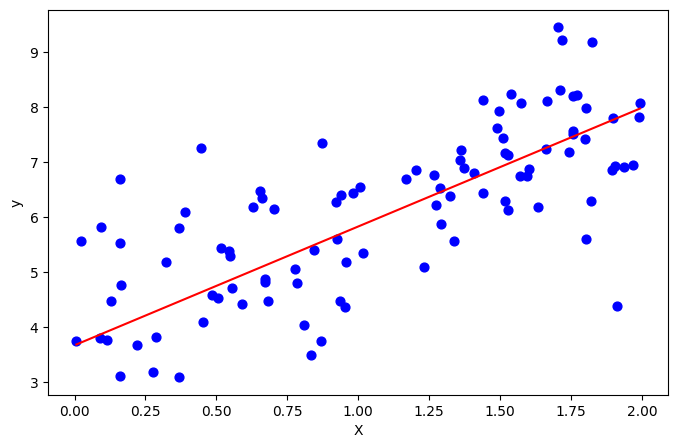

In [ ]:
### plot the data points
plt.subplots(figsize = (8,5))
plt.scatter(X,y, label='Data Points', s=40, color='Blue') # size of the scatter

### Plot the best fit line
x_line = np.linspace(min(X), max(X), 100)
y_line = theta_sgd[0][0] + theta_sgd[1][0]*x_line
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

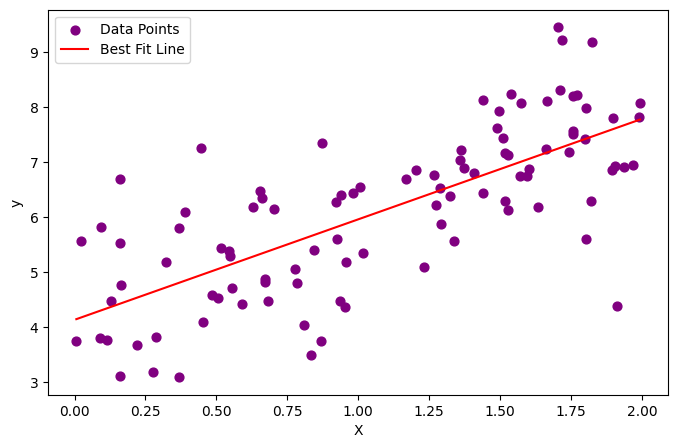

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming X and y are the input data
# X must be reshaped into 2D array for scikit-learn
X = X.reshape(-1, 1)  # Reshape to 2D array if necessary

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the best fit line
x_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot the data points
plt.subplots(figsize=(8, 5))
plt.scatter(X, y, label='Data Points', s=40, color='Purple')

# Plot the best fit line
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


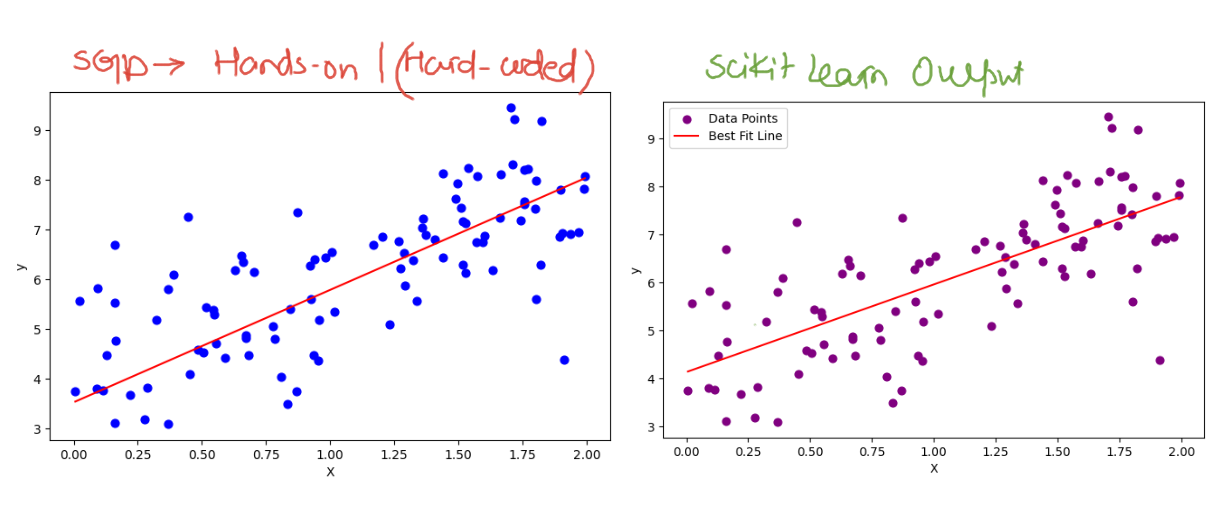

In [ ]:
cost_history_sgd.shape

(1000,)

In [ ]:
theta_history_sgd

array([[0.19401766, 0.75924223],
       [0.23752015, 0.81748534],
       [0.30499881, 0.92132155],
       ...,
       [3.67635277, 2.15826102],
       [3.67854105, 2.16157821],
       [3.67540424, 2.15665506]])

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

**# BATCH GRADIENT DESCENT ALGORITHM**

In [ ]:
def bgd(X, y, theta, learning_rate = 0.01, epochs=1000):

  '''
  X = Matrix of X with added bias units
  y = Vector of y
  theta = Vector of thetas - randomly assigned
  learning_rate : default 0.01
  epochs: number of times model will run through the entire the training set

  '''

  m = len(y) # no. of rows or training examples
  cost_history = np.zeros(epochs) #zero-array to store the cost after each update
  theta_history = np.zeros((epochs, theta.shape[0])) #zero-array to store the parameter (weights & biases) values


  for epoch in range(epochs):# no. of iterations through the entire dataset
    prediction = X.dot(theta)
    theta = theta - (1/m)*learning_rate *(X.T.dot(prediction - y))

    ### Update the empty arrays with theta and cost values
    cost = cal_cost(theta, X,y)
    theta_history[epoch,:] = theta.T # 2 parameters
    cost_history[epoch] = cost # uni-dimension

  return theta, cost_history, theta_history

In [ ]:
theta_bgd, cost_history_bgd, theta_history_bgd = bgd(X_b, y, theta,epochs=1000)

In [ ]:
print('BGD Theta0:          {:0.3f},\nBGD Theta1:          {:0.3f}'.format(theta_bgd[0][0], theta_bgd[1][0]))
print('BGD Final cost/MSE:  {:0.3f}'.format(cost_history_bgd[-1]))

BGD Theta0:          3.688,
BGD Theta1:          2.177
BGD Final cost/MSE:  0.532


Text(0.5, 0.5, 'Final Cost: 0.532\nTheta0: 3.688\nTheta1: 2.177')

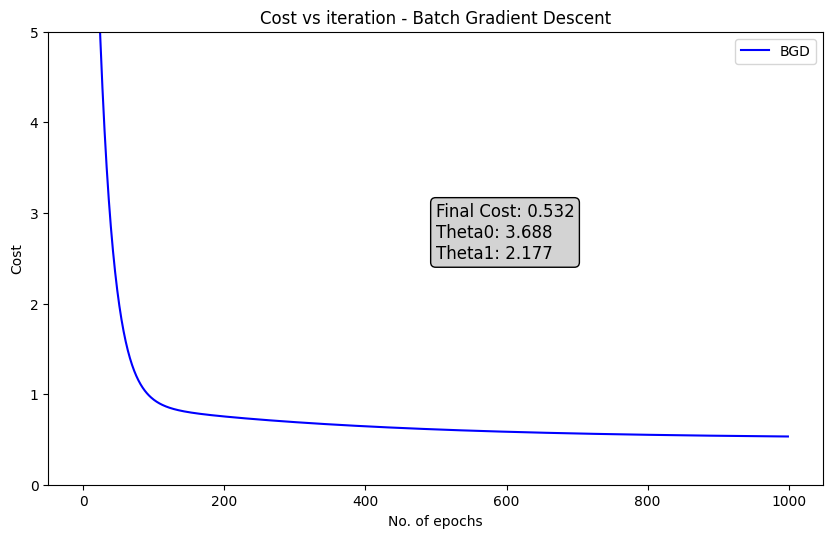

In [ ]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue')
plt.title('Cost vs iteration - Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)


**# MINI-BATCH GRADIENT DESCENT ALGORITHM**

In [ ]:
def mbgd(X,y, theta, learning_rate=0.01, epochs=100, batch_size=32):

  '''
  X = Matrix of X with added bias units
  y = Vector of y
  theta = Vector of thetas - randomly assigned
  learning_rate : default 0.01
  epochs: number of times model will run through the entire the training set
  batch_size: size of mini batches and default is 32
  '''
  m = len(y) #number of rows or training examples
  cost_history = np.zeros(epochs) #zero-array to store the cost after each update
  theta_history = np.zeros((epochs, theta.shape[0])) #zero-array to store the two parameters after each batch update (weight & bias values)
  # n_batches = m//batch_size #Floor Division

  for epoch in range(epochs):#outer-loop iterating over the number of epochs
    for i in range(0, m, batch_size): #inner-loop iterating over the entire training dataset but in mini-batches
      X_i = X[i : i + batch_size] #mini-batch samples for X
      y_i = y[i : i + batch_size] #mini-batch samples for y
      prediction = X_i.dot(theta)
      theta = theta - (1/batch_size)*learning_rate*(X_i.T.dot(prediction - y_i))


      ## Update the empty arrays with theta and cost values
      cost = cal_cost(theta, X, y)
      theta_history[epoch,:]=theta.T #2 parameters
      cost_history[epoch] = cost #uni-dimension

  return theta, cost_history, theta_history


In [ ]:
theta_mbgd, cost_history_mbgd, theta_history_mbgd = mbgd(X_b, y, theta, epochs=1000)

In [ ]:
epoch=1
m=100
batch_size=32
i=1
X_i = X[i : i + batch_size]
X_i

array([[1.27583379],
       [1.90516982],
       [0.5452515 ],
       [0.16116783],
       [1.49555252],
       [1.70532672],
       [1.89460399],
       [0.55532286],
       [1.0057752 ],
       [1.40872292],
       [1.9934054 ],
       [0.45360861],
       [1.33884552],
       [1.37410485],
       [1.51588778],
       [1.5288091 ],
       [1.75820831],
       [0.59074901],
       [0.983218  ],
       [0.67231352],
       [1.66477689],
       [1.01791163],
       [1.91401303],
       [0.54658333],
       [0.16018986],
       [0.77861053],
       [0.16467578],
       [1.79799761],
       [0.62753664],
       [0.16124697],
       [0.32317402],
       [0.92240727]])

In [ ]:
X_i.shape

(32, 1)

In [ ]:
print('MBGD Theta0:          {:0.3f},\nBGD Theta1:          {:0.3f}'.format(theta_mbgd[0][0], theta_mbgd[1][0]))
print('MBGD Final cost/MSE:  {:0.3f}'.format(cost_history_mbgd[-1]))

MBGD Theta0:          4.118,
BGD Theta1:          1.841
MBGD Final cost/MSE:  0.509


Text(0.5, 0.5, 'Final Cost: 0.509\nTheta0: 4.118\nTheta1: 1.841')

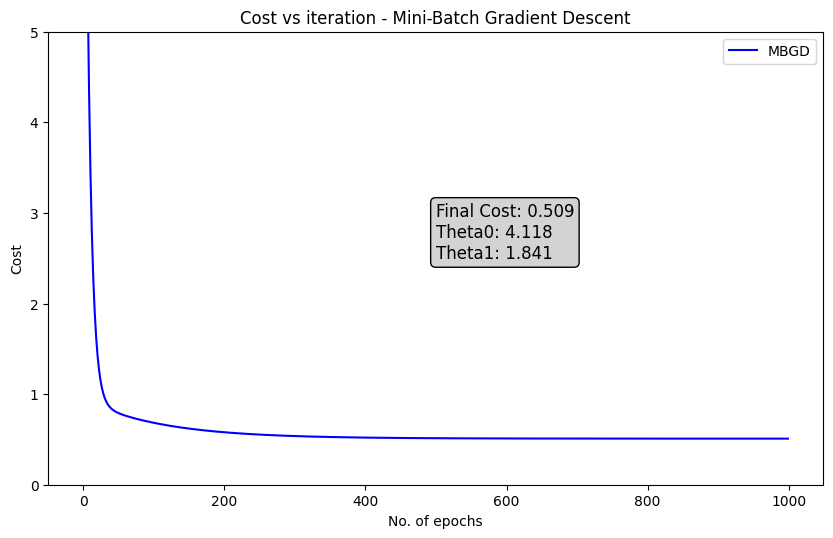

In [ ]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for MBGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='MBGD', color='blue')
plt.title('Cost vs iteration - Mini-Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)


### Cost history over iterations/updates by `SGD`, `BGD`, `MBGD`

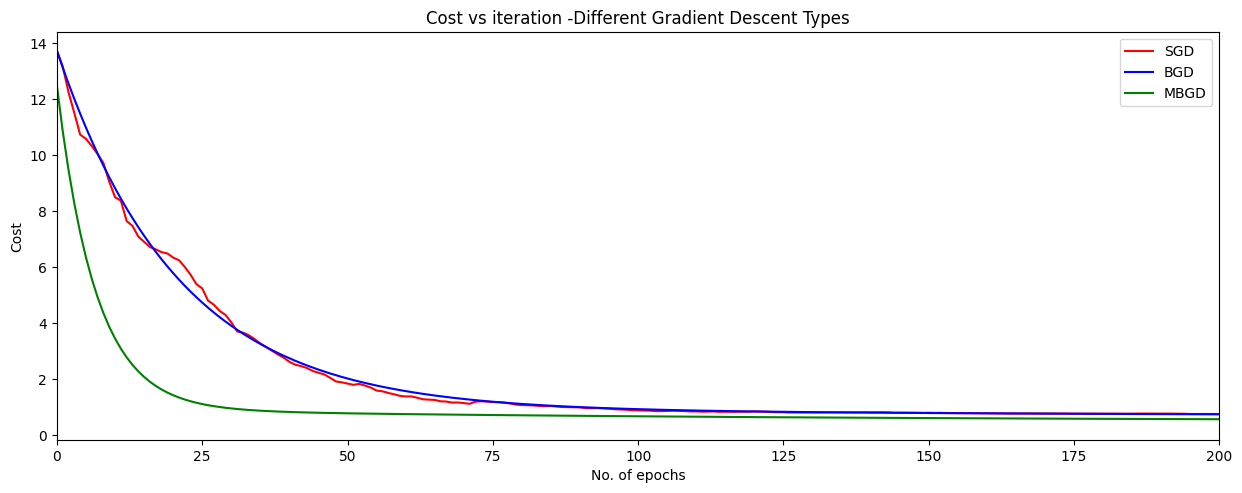

In [ ]:
### Plotting cost history for SGD, BGD, MBGD
plt.figure(figsize = (15,18))

### Plots for SGD, BGD, MBGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='red') #SGD
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue') #BGD
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='MBGD', color='green') #MBGD
plt.title('Cost vs iteration -Different Gradient Descent Types')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.xlim(0,200)
plt.legend()